In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [11]:
def logistic_sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [12]:
def poly(x, data):
    s = np.zeros(data.shape[0])
    
    for i in range(data.shape[1]):
        s = s * x + data[:,i]
        
    return s.reshape(-1,3)

In [13]:
def apply_trafos(x):
    x[:,0] = logistic_sigmoid(x[:,0]) # weight
    x[:,1] = logistic_sigmoid(x[:,1]) # mean
    x[:,2] = np.exp(x[:,2]) # var
    return x

In [14]:
def bethe_heitler(x, thickness):
    c = thickness / np.log(2)
    return ((-np.log(x))**(c-1)) / scipy.special.gamma(c)

In [15]:
data_cdf_cmp6_order5 = np.loadtxt("/home/benjamin/Documents/athena/Tracking/TrkFitter/TrkGaussianSumFilter/Data/BetheHeitler_cdf_nC6_O5.par", skiprows=1)

In [16]:
d = apply_trafos(poly(0.1, data_cdf_cmp6_order5)).T
print("wei",d[0])
print("mea",d[1])
print("var",d[2])

wei [0.08494789 0.10860357 0.11153885 0.1022842  0.12041191 0.47172993]
mea [0.4032292  0.74509682 0.89770223 0.96091627 0.98834215 0.99959741]
var [4.30340335e-02 1.56074643e-02 3.46763317e-03 5.00031731e-04
 5.44445394e-05 4.88659456e-07]


In [17]:
import scipy

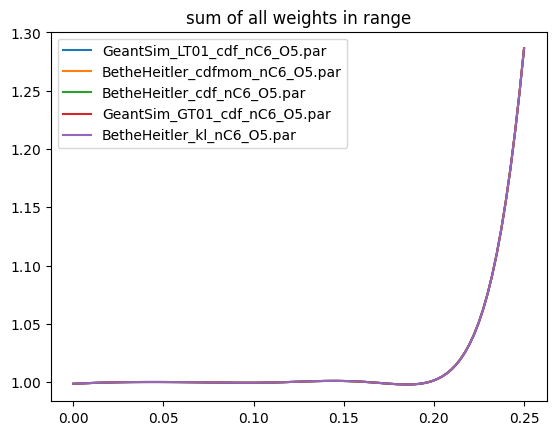

In [18]:
plt.title("sum of all weights in range")

r = np.linspace(0.01,0.99,1000)
x = np.linspace(0,0.25,100)
xfix = 0.05

for f in glob.glob("/home/benjamin/Documents/athena/Tracking/TrkFitter/TrkGaussianSumFilter/Data/*nC6_O5.par"):
    data = np.loadtxt(f, skiprows=1)
    
    plt.plot(x, [ sum(apply_trafos(poly(xx, data_cdf_cmp6_order5))[:,0]) for xx in x], label=os.path.basename(f))
    
plt.legend()

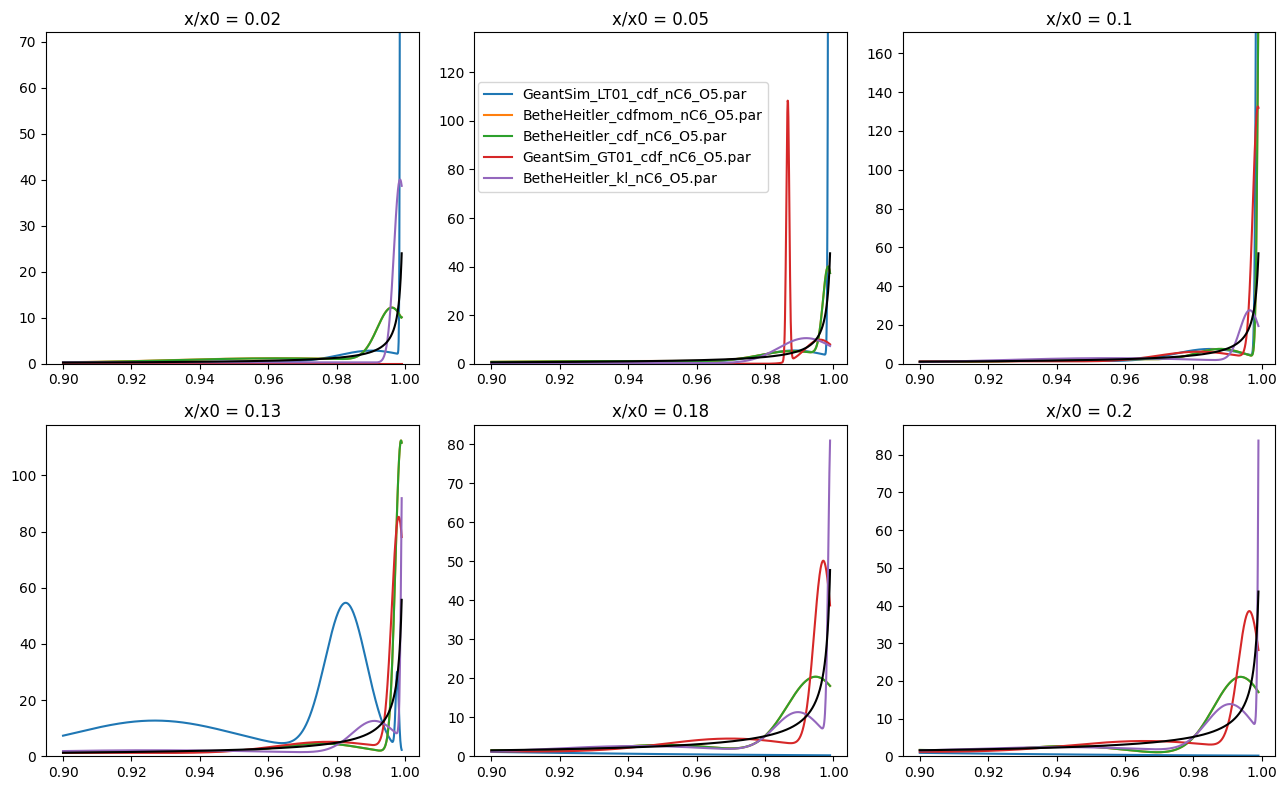

In [19]:
fig, axes = plt.subplots(2,3,figsize=(13,8))

r = np.linspace(0.9,0.999,1000)

files_glob = glob.glob("/home/benjamin/Documents/athena/Tracking/TrkFitter/TrkGaussianSumFilter/Data/*nC6_O5.par")
legend = []

for f in files_glob:
    legend.append(os.path.basename(f))

for ax, xfix in zip(axes.flatten(), [0.02, 0.05, 0.1, 0.13, 0.18, 0.2]):
    if xfix < 0:
        continue
        
    ax.set_title("x/x0 = {}".format(xfix))
    for f in files_glob:
        data = np.loadtxt(f, skiprows=1)

        cmps = apply_trafos(poly(xfix, data))
        #for c in cmps:
            #ax[1].plot(r, [ c[0] * scipy.stats.norm(loc=c[1], scale=np.sqrt(c[2])).pdf(rr) for rr in r ])

        ax.plot(r, [ sum([ p[0] * scipy.stats.norm(loc=p[1], scale=np.sqrt(p[2])).pdf(rr) for p in cmps]) for rr in r ])
    
    
    bh = bethe_heitler(r, xfix)
    ax.plot(r, bh, label="true BHD", color='black')
    #ax.set_yscale('log')
    ax.set_ylim(0,min(ax.get_ylim()[1],max(bh)*3))
    
fig.legend(legend, bbox_to_anchor=(0.6, 0.9))
plt.tight_layout()

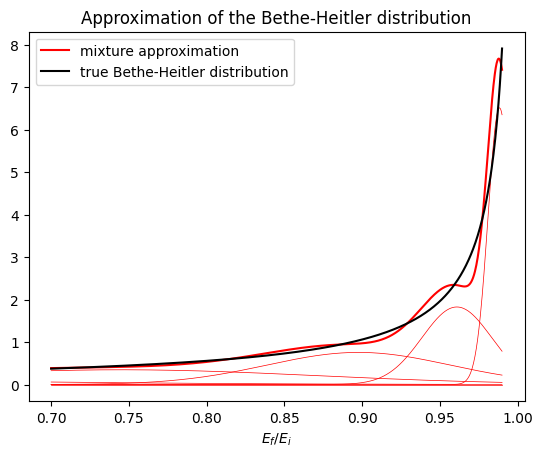

In [43]:
x = np.linspace(0.7,0.99,1000)


data = np.loadtxt("/home/benjamin/Documents/athena/Tracking/TrkFitter/TrkGaussianSumFilter/Data/BetheHeitler_cdf_nC6_O5.par", skiprows=1)
cmps = apply_trafos(poly(0.1, data))
plt.plot(x, [ sum([ p[0] * scipy.stats.norm(loc=p[1], scale=np.sqrt(p[2])).pdf(xx) for p in cmps]) for xx in x ], c='red', linewidth=1.5, label="mixture approximation")

for p in cmps:
    plt.plot(x, [ p[0] * scipy.stats.norm(loc=p[1], scale=np.sqrt(p[2])).pdf(xx) for xx in x ], c='red', linewidth=0.5)


bh = bethe_heitler(x, 0.1)
plt.plot(x, bh, color='black', label="true Bethe-Heitler distribution",linewidth=1.5)


plt.xlabel("$E_f/E_i$")
plt.title("Approximation of the Bethe-Heitler distribution")
plt.legend()
plt.savefig("bh_approximation.svg")